In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder   
from sklearn.preprocessing import OneHotEncoder 
from scipy.stats import norm
from scipy import stats
from scipy.stats import poisson
from math import factorial
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LassoCV
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
from scipy.stats import chi2_contingency
import warnings
from scipy.special import factorial
from sklearn.linear_model import ElasticNet
import panel as pn
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df1=pd.read_excel("2017 tramp dubai.xlsx")

In [3]:
df1.head()

,Metro - Red Line,Metro - Green Line,Tram,Month
0,14557,10236,8226,January
1,12940,9124,7408,February
2,14469,10087,8178,March
3,14007,9788,7947,April
4,14518,10001,8218,May


In [4]:
df1['Year']= 2017
print(df1)

    Metro - Red Line  Metro - Green Line   Tram      Month  Year
0              14557               10236   8226    January  2017
1              12940                9124   7408   February  2017
2              14469               10087   8178      March  2017
3              14007                9788   7947      April  2017
4              14518               10001   8218        May  2017
5              13459                8915   7896       June  2017
6              15008               10115   8218       July  2017
7              15222               10174   8211     August  2017
8              15231                9785   7894  September  2017
9              15541               10161   8218    October  2017
10             14199               10121   8130   November  2017
11             14669               10395   8423   December  2017
12            173820              118902  96967      Total  2017


In [5]:
df2=pd.read_excel("2018 tramp dubai.xlsx")

In [6]:
df2.head()

,Metro - Red Line,Metro - Green Line,Tram,Month
0,26793,10532,8448,January
1,25712,9395,7600,February
2,28186,10345,8385,March
3,27662,10095,8149,April
4,28400,10041,8432,May


In [7]:
df2['Year']= 2018
print(df2)

    Metro - Red Line  Metro - Green Line   Tram      Month  Year
0              26793               10532   8448    January  2018
1              25712                9395   7600   February  2018
2              28186               10345   8385      March  2018
3              27662               10095   8149      April  2018
4              28400               10041   8432        May  2018
5              28021                9788   8094       June  2018
6              28619               10436   8393       July  2018
7              28901               10521   8386     August  2018
8              27556               10072   8150  September  2018
9              28679               10449   8418    October  2018
10             27436               10019   8104   November  2018
11             28842               10544   8470   December  2018
12            334807              122237  99029      Total  2018


In [8]:
df3=pd.read_excel("2019 tramp dubai.xlsx")

In [9]:
df3.head()

,Metro - Red Line,Metro - Green Line,Tram,Month
0,28481,10553,8429,January
1,25700,9396,7600,February
2,28188,10318,8376,March
3,23166,10120,8154,April
4,15974,10044,8359,May


In [10]:
df3['Year']= 2019
print(df3)

    Metro - Red Line  Metro - Green Line   Tram      Month  Year
0              28481               10553   8429    January  2019
1              25700                9396   7600   February  2019
2              28188               10318   8376      March  2019
3              23166               10120   8154      April  2019
4              15974               10044   8359        May  2019
5              16756               10303   8114       June  2019
6              16907               10446   8419       July  2019
7              17185               10583   8386     August  2019
8              16396                9978   8150  September  2019
9              16846               10471   8430    October  2019
10             16031                9845   8103   November  2019
11             17321               10609   8466   December  2019
12            238951              122666  98986      Total  2019


In [11]:
df1

,Metro - Red Line,Metro - Green Line,Tram,Month,Year
0,14557,10236,8226,January,2017
1,12940,9124,7408,February,2017
2,14469,10087,8178,March,2017
3,14007,9788,7947,April,2017
4,14518,10001,8218,May,2017
5,13459,8915,7896,June,2017
6,15008,10115,8218,July,2017
7,15222,10174,8211,August,2017
8,15231,9785,7894,September,2017
9,15541,10161,8218,October,2017


In [12]:
df17 = pd.melt(df1, id_vars=['Month', 'Year'], var_name='Transport by', value_name='Number of Passengers')

# Remove the 'Total' rows
df17= df17[df17['Month'] != 'Total']

# Display the transformed DataFrame
print(df17)

        Month  Year        Transport by  Number of Passengers
0     January  2017    Metro - Red Line                 14557
1    February  2017    Metro - Red Line                 12940
2       March  2017    Metro - Red Line                 14469
3       April  2017    Metro - Red Line                 14007
4         May  2017    Metro - Red Line                 14518
5        June  2017    Metro - Red Line                 13459
6        July  2017    Metro - Red Line                 15008
7      August  2017    Metro - Red Line                 15222
8   September  2017    Metro - Red Line                 15231
9     October  2017    Metro - Red Line                 15541
10   November  2017    Metro - Red Line                 14199
11   December  2017    Metro - Red Line                 14669
13    January  2017  Metro - Green Line                 10236
14   February  2017  Metro - Green Line                  9124
15      March  2017  Metro - Green Line                 10087
16      

In [13]:
df2

,Metro - Red Line,Metro - Green Line,Tram,Month,Year
0,26793,10532,8448,January,2018
1,25712,9395,7600,February,2018
2,28186,10345,8385,March,2018
3,27662,10095,8149,April,2018
4,28400,10041,8432,May,2018
5,28021,9788,8094,June,2018
6,28619,10436,8393,July,2018
7,28901,10521,8386,August,2018
8,27556,10072,8150,September,2018
9,28679,10449,8418,October,2018


In [14]:
df18= pd.melt(df2, id_vars=['Month', 'Year'], var_name='Transport by', value_name='Number of Passengers')

# Remove the 'Total' rows
df18 = df18[df18['Month'] != 'Total']

# Display the transformed DataFrame
print(df18)

        Month  Year        Transport by  Number of Passengers
0     January  2018    Metro - Red Line                 26793
1    February  2018    Metro - Red Line                 25712
2       March  2018    Metro - Red Line                 28186
3       April  2018    Metro - Red Line                 27662
4         May  2018    Metro - Red Line                 28400
5        June  2018    Metro - Red Line                 28021
6        July  2018    Metro - Red Line                 28619
7      August  2018    Metro - Red Line                 28901
8   September  2018    Metro - Red Line                 27556
9     October  2018    Metro - Red Line                 28679
10   November  2018    Metro - Red Line                 27436
11   December  2018    Metro - Red Line                 28842
13    January  2018  Metro - Green Line                 10532
14   February  2018  Metro - Green Line                  9395
15      March  2018  Metro - Green Line                 10345
16      

In [15]:
df3

,Metro - Red Line,Metro - Green Line,Tram,Month,Year
0,28481,10553,8429,January,2019
1,25700,9396,7600,February,2019
2,28188,10318,8376,March,2019
3,23166,10120,8154,April,2019
4,15974,10044,8359,May,2019
5,16756,10303,8114,June,2019
6,16907,10446,8419,July,2019
7,17185,10583,8386,August,2019
8,16396,9978,8150,September,2019
9,16846,10471,8430,October,2019


In [16]:
df19 = pd.melt(df3, id_vars=['Month', 'Year'], var_name='Transport by', value_name='Number of Passengers')

# Remove the 'Total' rows
df19 = df19[df19['Month'] != 'Total']

# Display the transformed DataFrame
print(df19)

        Month  Year        Transport by  Number of Passengers
0     January  2019    Metro - Red Line                 28481
1    February  2019    Metro - Red Line                 25700
2       March  2019    Metro - Red Line                 28188
3       April  2019    Metro - Red Line                 23166
4         May  2019    Metro - Red Line                 15974
5        June  2019    Metro - Red Line                 16756
6        July  2019    Metro - Red Line                 16907
7      August  2019    Metro - Red Line                 17185
8   September  2019    Metro - Red Line                 16396
9     October  2019    Metro - Red Line                 16846
10   November  2019    Metro - Red Line                 16031
11   December  2019    Metro - Red Line                 17321
13    January  2019  Metro - Green Line                 10553
14   February  2019  Metro - Green Line                  9396
15      March  2019  Metro - Green Line                 10318
16      

In [17]:
df19.shape

(36, 4)

In [18]:
# Merge the datasets
data = pd.concat([df17, df18, df19], ignore_index=True)

print(data)

         Month  Year      Transport by  Number of Passengers
0      January  2017  Metro - Red Line                 14557
1     February  2017  Metro - Red Line                 12940
2        March  2017  Metro - Red Line                 14469
3        April  2017  Metro - Red Line                 14007
4          May  2017  Metro - Red Line                 14518
..         ...   ...               ...                   ...
103     August  2019              Tram                  8386
104  September  2019              Tram                  8150
105    October  2019              Tram                  8430
106   November  2019              Tram                  8103
107   December  2019              Tram                  8466

[108 rows x 4 columns]


In [19]:
data

,Month,Year,Transport by,Number of Passengers
0,January,2017,Metro - Red Line,14557
1,February,2017,Metro - Red Line,12940
2,March,2017,Metro - Red Line,14469
3,April,2017,Metro - Red Line,14007
4,May,2017,Metro - Red Line,14518
...,...,...,...,...
103,August,2019,Tram,8386
104,September,2019,Tram,8150
105,October,2019,Tram,8430
106,November,2019,Tram,8103


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 108 non-null    object
 1   Year                  108 non-null    int64 
 2   Transport by          108 non-null    object
 3   Number of Passengers  108 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.5+ KB


In [21]:
duplicate_rows_data = data[data.duplicated()]
print('number of duplicate rows', duplicate_rows_data.shape)

number of duplicate rows (0, 4)


In [22]:
print(data.isnull().sum())

Month                   0
Year                    0
Transport by            0
Number of Passengers    0
dtype: int64


In [23]:
data.count()

Month                   108
Year                    108
Transport by            108
Number of Passengers    108
dtype: int64

<Axes: xlabel='Number of Passengers'>

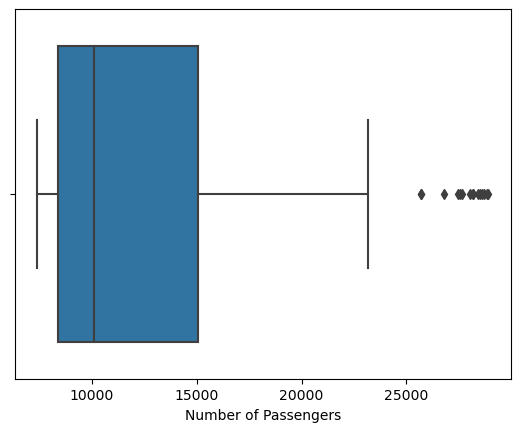

In [24]:
sns.boxplot(data=data, x="Number of Passengers")

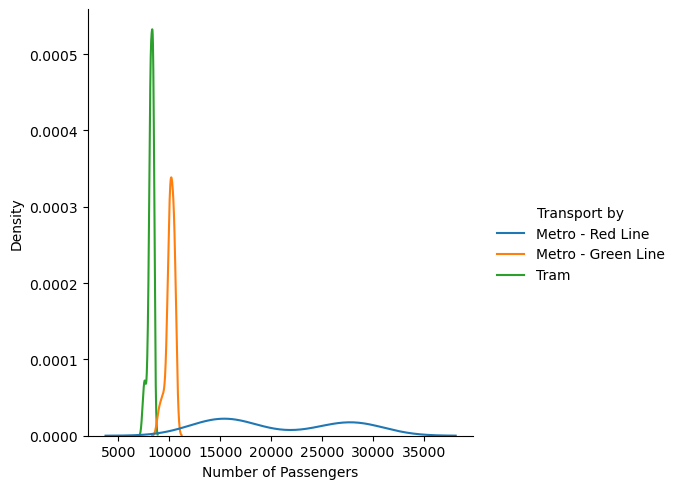

In [25]:
sns.displot(data=data, x="Number of Passengers", hue="Transport by", kind="kde")

In [26]:
data_skew_value = stats.skew(data['Number of Passengers'], axis=0, bias=True)
print('Skew Value',data_skew_value)

Skew Value 1.475881342279711


In [27]:
kurtosis_value = stats.kurtosis(data['Number of Passengers'], axis=0, bias=True)
print('kurtosis Value',kurtosis_value)

kurtosis Value 0.7834018118334254


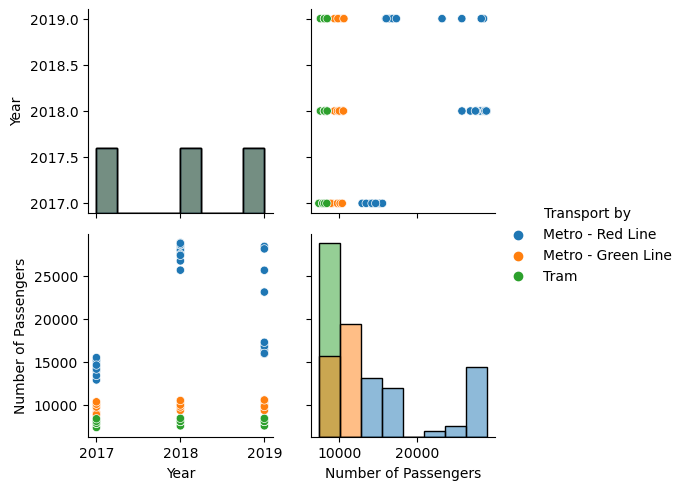

In [28]:
g = sns.PairGrid(data, hue="Transport by")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

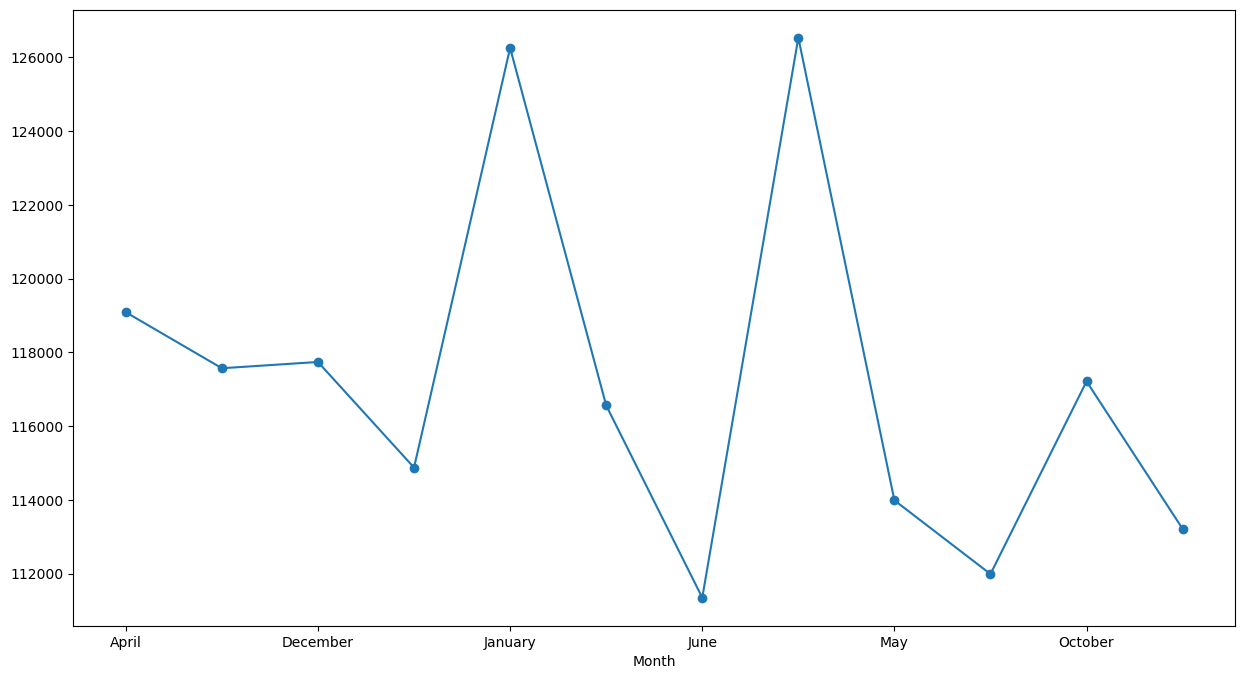

In [29]:
def mpl_plot_line(df):
    return df.groupby('Month')['Number of Passengers'].sum().plot(figsize=(15, 8), marker='o')

outdata = pd.DataFrame(data)  

mpl_plot_line(outdata)


%matplotlib inline

plt.show()


In [30]:
def plot_boxplot(data_frame, col_name):
    plt.figure(figsize=(10,8))
    sns.boxplot(data = data_frame, x=col_name);

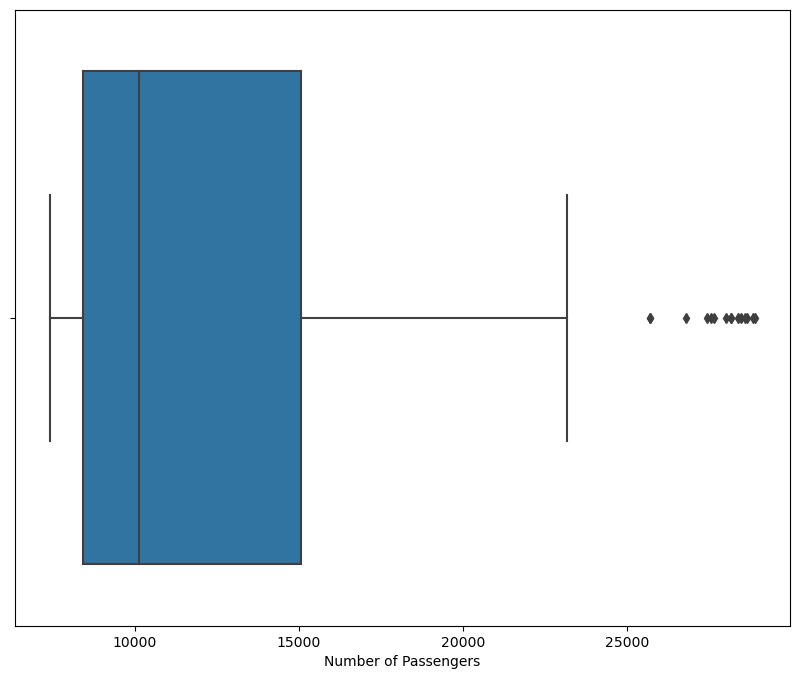

In [31]:
plot_boxplot(data, 'Number of Passengers')

In [32]:
def remove_outliers(dataframe, col_name):
    Q1 = dataframe[col_name].quantile(0.25)
    Q3 = dataframe[col_name].quantile(0.75)
    IQR = Q3-Q1 
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print('IQR',IQR)
    print('lower_limit',lower_limit)
    print('upper_limit',upper_limit)
    new_data = dataframe[(dataframe['Number of Passengers'] > lower_limit) & (dataframe['Number of Passengers'] < upper_limit)]
    return new_data
 
# 1st degree to remove outliers    
data1 = remove_outliers(data, 'Number of Passengers')


IQR 6649.75
lower_limit -1562.875
upper_limit 25036.125


<Axes: xlabel='Number of Passengers'>

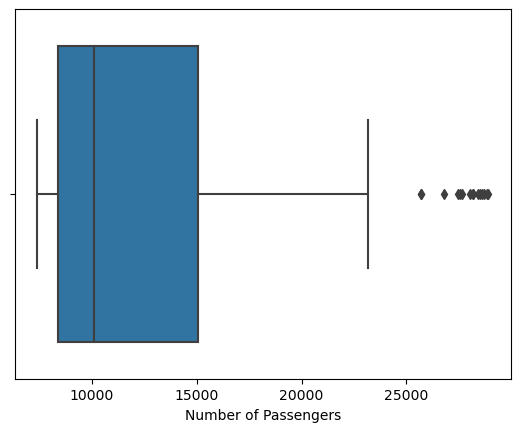

In [33]:
sns.boxplot(data=data, x="Number of Passengers")

In [34]:
data1 = remove_outliers(data1, 'Number of Passengers')

IQR 2168.0
lower_limit 5133.0
upper_limit 13805.0


In [35]:
data1 = remove_outliers(data1, 'Number of Passengers')

IQR 1933.0
lower_limit 5318.5
upper_limit 13050.5


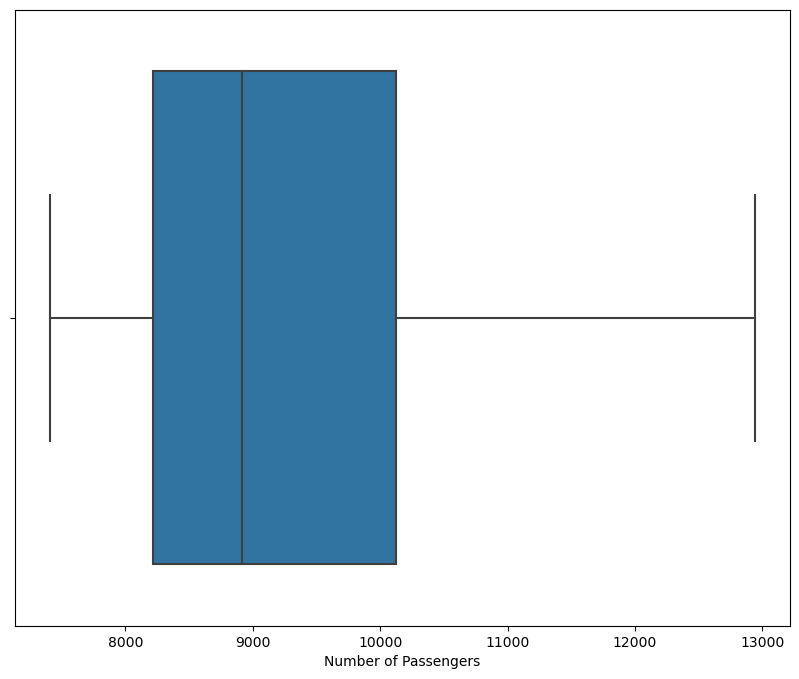

In [36]:
plot_boxplot(data1, 'Number of Passengers')

In [37]:
data1_skew_value = stats.skew(data1['Number of Passengers'], axis=0, bias=True)
print('Skew Value',data1_skew_value)

Skew Value 0.4857314811384829


In [38]:
kurtosis_value = stats.kurtosis(data1['Number of Passengers'], axis=0, bias=True)
print('kurtosis Value',kurtosis_value)

kurtosis Value -0.20400270830717648


,Year,Number of Passengers
Year,1.00000,0.03113
Number of Passengers,0.03113,1.00000


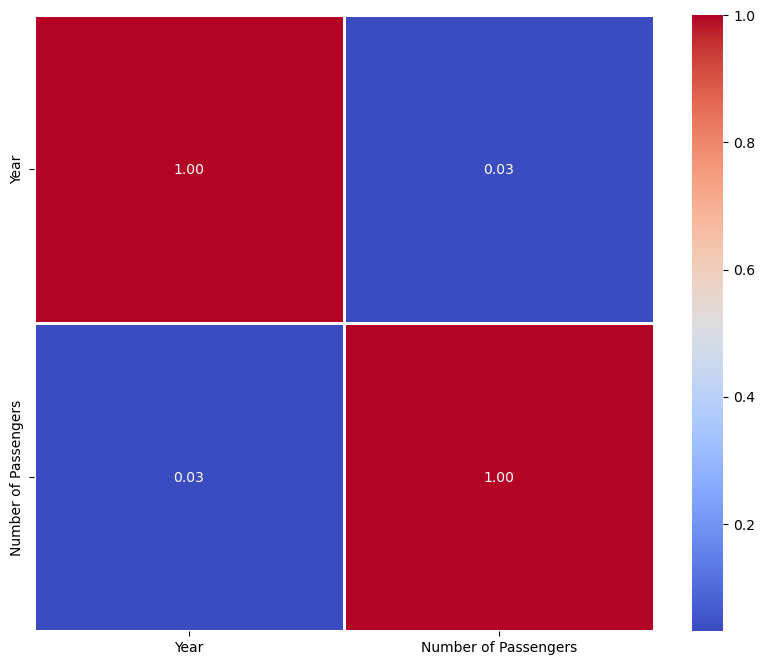

In [39]:
# 
plt.figure(figsize=(10,8))
correlation =data1.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt='.2f', linewidths=2, cmap="coolwarm")
correlation

<Axes: xlabel='Number of Passengers', ylabel='Count'>

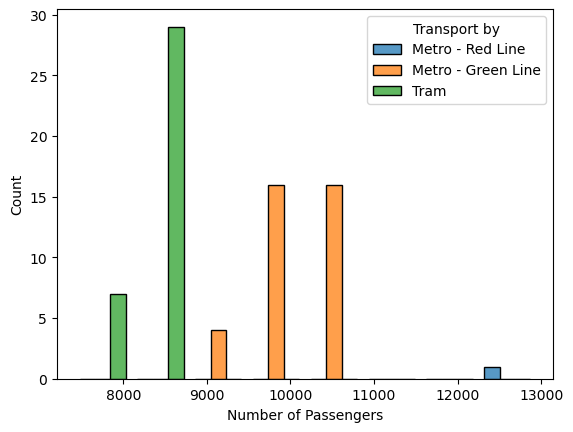

In [40]:
sns.histplot(data=data1, x="Number of Passengers", hue="Transport by", multiple="dodge", shrink=.8)

<Figure size 1000x800 with 0 Axes>

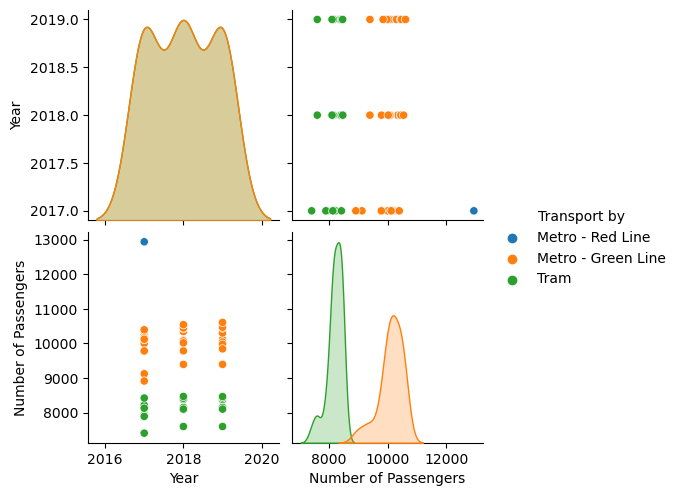

In [41]:
plt.figure(figsize=(10,8));
sns.pairplot(data1, hue="Transport by");
plt.show()

In [42]:
data1.describe()

,Year,Number of Passengers
count,73.000000,73.000000
mean,2017.986301,9201.739726
std,0.824843,1105.998104
min,2017.000000,7408.000000
25%,2017.000000,8218.000000
50%,2018.000000,8915.000000
75%,2019.000000,10121.000000
max,2019.000000,12940.000000


In [43]:
import plotly.express as px
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output

In [44]:
df = data

# Build App
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Transport in Dubai"),
    
    dcc.Graph(id='graph'),

    html.Label("Select Year"),
    dcc.Dropdown(
        id='Year-dropdown',
        clearable=False,
        value=df['Year'].unique()[0],
        options=[
            {'label': year, 'value': year}
            for year in df['Year'].unique()
        ]
    ),
])

# Callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("Year-dropdown", "value")]
)
def update_figure(selected_year):
    filtered_df = df[df['Year'] == selected_year]
    return px.scatter(
        filtered_df,
        x="Month",
        y="Number of Passengers",
        color="Transport by",
        render_mode="webgl",
        title=f"Transport in Dubai - {selected_year}"
    )

# Run app
app.run_server(mode='external', port=8051)


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 108 non-null    object
 1   Year                  108 non-null    int64 
 2   Transport by          108 non-null    object
 3   Number of Passengers  108 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.5+ KB


# Statistical Analysis

In [46]:
data.describe()

,Year,Number of Passengers
count,108.000000,108.000000
mean,2018.000000,13021.898148
std,0.820303,6622.598589
min,2017.000000,7408.000000
25%,2017.000000,8411.750000
50%,2018.000000,10120.500000
75%,2019.000000,15061.500000
max,2019.000000,28901.000000


In [47]:
from scipy.stats import norm

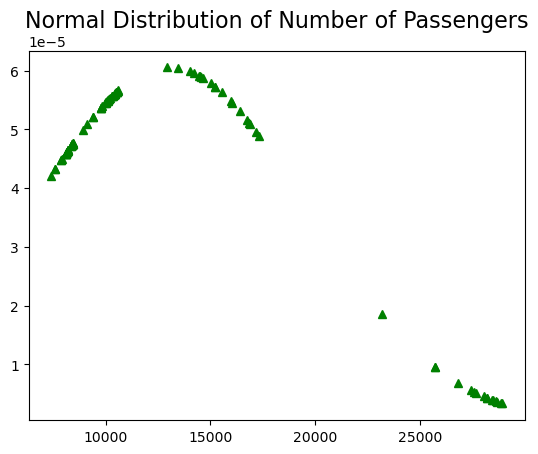

In [48]:
data1 = data['Number of Passengers'].values

# Calculate mean and standard deviation
mean_passengers = data1.mean()
std_passengers = data1.std()

# Generate normal PDF
normal_df = norm.pdf(data1, loc=mean_passengers, scale=std_passengers)

# Plot the data points against the normal PDF
plt.plot(data1, normal_df, 'g^')
plt.title("Normal Distribution of Number of Passengers", fontsize=16)
plt.show()

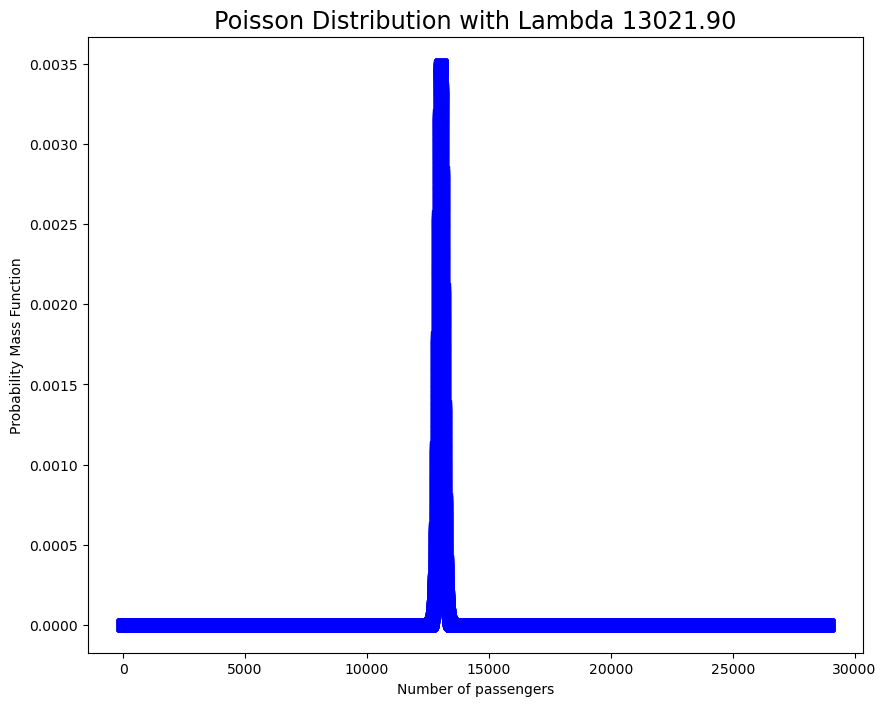

In [49]:
from scipy.stats import poisson
from math import factorial
def plot_poisson_distribution(column_values):
    # Calculate the mean and variance (lambda) of the Poisson distribution
    lambda_value = column_values.mean()

    # Generate x values from 0 to the maximum value in the data
    x = np.arange(0, column_values.max() + 1)

    # Calculate Poisson probability mass function
    y = poisson.pmf(x, mu=lambda_value)

    plt.figure(figsize=(10, 8))
    plt.title("Poisson Distribution with Lambda {:.2f}".format(lambda_value), fontsize="xx-large")
    plt.plot(x, y, 'bs', markersize=8)
    plt.xlabel('Number of passengers')
    plt.ylabel('Probability Mass Function')
    plt.show()

# Call function
plot_poisson_distribution(data['Number of Passengers'])

## chi Square test

In [50]:
data_table=pd.crosstab(data['Year'],data['Number of Passengers'])
data_table

Number of Passengers,7408,7600,7894,7896,7947,8094,8103,8104,8114,8130,...,27662,28021,28186,28188,28400,28481,28619,28679,28842,28901
Year,,,,,,,,,,,,,,,,,,,,,
2017,1,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2018,0,1,0,0,0,1,0,1,0,0,...,1,1,1,0,1,0,1,1,1,1
2019,0,1,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0


In [51]:
contingency_table = pd.crosstab(index=data['Month'], columns=[data['Transport by']], values=data['Number of Passengers'], aggfunc='count', margins=True, margins_name='Total')

print(contingency_table)

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")
  

Transport by  Metro - Green Line  Metro - Red Line  Tram  Total
Month                                                          
April                          3                 3     3      9
August                         3                 3     3      9
December                       3                 3     3      9
February                       3                 3     3      9
January                        3                 3     3      9
July                           3                 3     3      9
June                           3                 3     3      9
March                          3                 3     3      9
May                            3                 3     3      9
November                       3                 3     3      9
October                        3                 3     3      9
September                      3                 3     3      9
Total                         36                36    36    108
Chi-squared statistic: 0.0
P-value: 1.0


##wilcoxon test

In [52]:
from scipy.stats import wilcoxon

data_before = data['Year']
data_after = data['Number of Passengers']

statistic, p_value = wilcoxon(data_before, data_after)

print(f"Wilcoxon Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


Wilcoxon Statistic: 0.0
P-value: 1.8679594215042613e-19
Reject the null hypothesis: There is a significant difference.


##T Test

In [53]:
from scipy.stats import ttest_ind

data_year_2018 = data[data['Year'] == 2018]['Number of Passengers']
data_year_2019 = data[data['Year'] == 2019]['Number of Passengers']

statistic, p_value = ttest_ind(data_year_2018, data_year_2019, equal_var=False)

print(f"T-test Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-test Statistic: 1.4819092969568393
P-value: 0.14357065210144251
Fail to reject the null hypothesis: There is no significant difference.


In [54]:
population_std_dev = 6622

data_year_2018 = data[data['Year'] == 2018]['Number of Passengers']
data_year_2019 = data[data['Year'] == 2019]['Number of Passengers']

mean_2018 = np.mean(data_year_2018)
mean_2019 = np.mean(data_year_2019)

std_error_diff = np.sqrt((np.var(data_year_2018) / len(data_year_2018)) + (np.var(data_year_2019) / len(data_year_2019)))

z_statistic = (mean_2018 - mean_2019) / std_error_diff

p_value = 2 * (1 - norm.cdf(abs(z_statistic)))

print(f"Z-test Statistic: {z_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


Z-test Statistic: 1.502930336933781
P-value: 0.13285700901762532
Fail to reject the null hypothesis: There is no significant difference.


In [55]:
data.head(20)

,Month,Year,Transport by,Number of Passengers
0,January,2017,Metro - Red Line,14557
1,February,2017,Metro - Red Line,12940
2,March,2017,Metro - Red Line,14469
3,April,2017,Metro - Red Line,14007
4,May,2017,Metro - Red Line,14518
5,June,2017,Metro - Red Line,13459
6,July,2017,Metro - Red Line,15008
7,August,2017,Metro - Red Line,15222
8,September,2017,Metro - Red Line,15231
9,October,2017,Metro - Red Line,15541


# Machine Learning and Analysis

In [56]:
# calling the method from preprocessing class and assign into variable
ord_encoder = OrdinalEncoder()             # Ordinal Data
lab_encoder = LabelEncoder()               # Label Data or Nominal Data
cat_encoder = OneHotEncoder(sparse=False)  # Categorical Data | Nominal

# assign data frame to new variable 
data2 = data
data2['Transport by'] = ord_encoder.fit_transform(data2[['Transport by']])
data2['Month'] = lab_encoder.fit_transform(data2['Month'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 108 non-null    int64  
 1   Year                  108 non-null    int64  
 2   Transport by          108 non-null    float64
 3   Number of Passengers  108 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.5 KB


In [57]:
data2.head()

,Month,Year,Transport by,Number of Passengers
0,4,2017,1.0,14557
1,3,2017,1.0,12940
2,7,2017,1.0,14469
3,0,2017,1.0,14007
4,8,2017,1.0,14518


In [58]:
from sklearn.preprocessing import StandardScaler

# Assuming 'enluas1' is your DataFrame
data2_log_transformed = np.log1p(data2)

scaler = StandardScaler()
data3= pd.DataFrame(scaler.fit_transform(data2_log_transformed), columns=data2.columns)


In [59]:
data3.head()

,Month,Year,Transport by,Number of Passengers
0,-0.077610,-1.224846,0.211405,0.504464
1,-0.385965,-1.224846,0.211405,0.221839
2,0.571872,-1.224846,0.211405,0.489910
3,-2.301640,-1.224846,0.211405,0.412019
4,0.734633,-1.224846,0.211405,0.498025


In [60]:
X =data3[['Year','Month','Transport by']]
y =data3['Number of Passengers']

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')


Training MSE: 0.9720073949715441
Testing MSE: 1.0711726317804287


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train: (86, 3)
X_test: (22, 3)
y_train: (86,)
y_test: (22,)


# Linear Regression

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_preds_train = model.predict(X_train)
y_preds_test = model.predict(X_test)

In [66]:
print("R-squared of the model in training set is: {}".format(model.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(model.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.017830381673382023
-----Test set statistics-----
R-squared of the model in test set is: -0.20676334775837812
Root mean squared error of the prediction is: 1.0349747010340054
Mean absolute percentage error of the prediction is: 104.3683451046278


# Random Forest

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [68]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [69]:
y_pred_random = regressor.predict(X_test)

In [70]:
train_r_squared = regressor.score(X_train, Y_train)
print("R-squared of the model in the training set is: {}".format(train_r_squared))
test_r_squared = regressor.score(X_test, Y_test)
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(test_r_squared))
rmse_value = mean_squared_error(Y_test, y_pred_random) ** 0.5
print("Root mean squared error of the prediction is: {}".format(rmse_value))
mape_value = np.mean(np.abs((Y_test - y_pred_random) / Y_test)) * 100
print("Mean absolute percentage error of the prediction is: {}".format(mape_value))

R-squared of the model in the training set is: 0.9899144548553975
-----Test set statistics-----
R-squared of the model in the test set is: 0.8286459508565617
Root mean squared error of the prediction is: 0.39000112888492555
Mean absolute percentage error of the prediction is: 34.2956487361504


# Dicision Tree

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [72]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [73]:
y_pred_DT = DTregressor.predict(X_test)

In [74]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.8287429736870278
Root mean squared error of the prediction is: 0.38989070146477556
Mean absolute percentage error of the prediction is: 31.40048064404693


# Lasso Regression

In [75]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
lasso_regression = GridSearchCV(Lasso(), param_grid={'alpha': [0.01, 0.1, 5, 42, 100]}, verbose=1, n_jobs=-1)
lasso_regression.fit(X_train, Y_train)

best_alpha = lasso_regression.best_params_['alpha']

lasso_model = Lasso(alpha=best_alpha)
lasso_model.fit(X_train, Y_train)
lasso_value = lasso_regression.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [76]:
y_lasso_pridct_train = lasso_value.predict(X_train)
y_lasso_pridct_test = lasso_value.predict(X_test)

In [77]:
print("R-squared of the model in Training set is: {}%\n".format(round(lasso_value.score(X_train,Y_train)*100,3)))
print("*****Statistical Value for Test Model*****\n")
print("R-squared of the model in Test set is: {}%".format(round(lasso_value.score(X_test,Y_test)*100,3)))
print("Root mean squared error of the prediction is: {}%".format(round(rmse(Y_test,y_lasso_pridct_test)*100,3)))
print("Mean absolute percentage error of the prediction is: {}%".format(round(np.mean(np.abs((Y_test - y_lasso_pridct_test)/ Y_test))*100,3)))

R-squared of the model in Training set is: 0.0%

*****Statistical Value for Test Model*****

R-squared of the model in Test set is: -21.619%
Root mean squared error of the prediction is: 103.901%
Mean absolute percentage error of the prediction is: 99.453%


# Logistic Regression

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [79]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [80]:
import statsmodels.api as sm

In [81]:
X_train

,Year,Month,Transport by
92,1.224644,1.132172,-1.316686
20,-1.224846,1.132172,-1.316686
37,0.000202,-0.385965,0.211405
6,-1.224846,0.174334,0.211405
3,-1.224846,-2.301640,0.211405
...,...,...,...
87,1.224644,-2.301640,-1.316686
103,1.224644,-1.343803,1.105281
67,0.000202,-1.343803,1.105281
24,-1.224846,-0.077610,1.105281


In [82]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/Users/ashish/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning:

overflow encountered in exp

/Users/ashish/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning:

invalid value encountered in log

/Users/ashish/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning:

divide by zero encountered in log

/Users/ashish/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce



<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     Number of Passengers   No. Observations:                   75
Model:                              GLM   Df Residuals:                       71
Model Family:                  Binomial   Df Model:                            3
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                    nan
Date:                  Fri, 12 Jan 2024   Deviance:                       5994.0
Time:                          12:29:17   Pearson chi2:                 3.33e+17
No. Iterations:                       9   Pseudo R-squ. (CS):                nan
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.589e+15   7.78e+06  -2.04e+08      0.000   -1.59e+15   -1.59e+15
Year          4.405e+13   7.81e+06   5.64e+06      0.000    4.41e+13    4.41e+13
Month         4.369e+14   7.41e+06    5.9e+07      0.000    4.37e+14    4.37e+14
Transport by  3.598e+14    7.8e+06   4.62e+07      0.000     3.6e+14     3.6e+14
================================================================================
"""

In [83]:
X = data3[['Transport by', 'Month', 'Year']]

threshold = 1
y = (data3['Number of Passengers'] > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_model = LogisticRegression(random_state=42, class_weight='balanced')  # Added class_weight='balanced'
logistic_model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

logm1 = sm.GLM(y_train, sm.add_constant(X_train_scaled), family=sm.families.Binomial())
log_results = logm1.fit()
print(log_results.summary())


Accuracy: 0.36363636363636365

Confusion Matrix:
[[ 8 11]
 [ 3  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.42      0.53        19
           1       0.00      0.00      0.00         3

    accuracy                           0.36        22
   macro avg       0.36      0.21      0.27        22
weighted avg       0.63      0.36      0.46        22

                  Generalized Linear Model Regression Results                   
Dep. Variable:     Number of Passengers   No. Observations:                   86
Model:                              GLM   Df Residuals:                       82
Model Family:                  Binomial   Df Model:                            3
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -34.590
Date:                  Fri, 12 Jan 2024   Deviance:                       69.181
Time:         